In [ ]:
import random
import os
import numpy as np 
import pandas as pd 
import requests
import pandas_datareader as web

# Date
import datetime as dt
from datetime import date, timedelta, datetime

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error,explained_variance_score, r2_score, mean_absolute_percentage_error
import math


# Modeling and preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor


from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.base import BaseEstimator


import warnings
warnings.filterwarnings("ignore")

Daily data forecast 

In [2]:
#Daily dataset
df = pd.read_csv('/kaggle/input/commdaily/commodities_DAILY.csv', parse_dates=True)
display(df)

,Dates,CL1_PX_LAST,CL1_VOLATILITY_10D,CL1_VOLATILITY_20D,NG1_PX_LAST,NG1_VOLATILITY_10D,NG1_VOLATILITY_20D,HO1_PX_LAST,HO1_VOLATILITY_10D,HO1_VOLATILITY_20D,...,HG1_VOLATILITY_20D,GC1_PX_LAST,GC1_VOLATILITY_10D,GC1_VOLATILITY_20D,CT1_PX_LAST,CT1_VOLATILITY_10D,CT1_VOLATILITY_20D,LC1_PX_LAST,LC1_VOLATILITY_10D,LC1_VOLATILITY_20D
0,12/30/1999,25.60,30.94,32.43,2.329,46.714,60.137,69.03,21.16,28.16,...,22.09,289.6,6.59,15.48,50.74,18.38,18.96,68.475,9.598,9.340
1,12/31/1999,25.60,30.94,32.43,2.329,46.714,60.137,69.03,21.16,28.16,...,22.09,289.6,6.59,15.48,50.74,18.25,18.92,68.475,9.338,9.343
2,1/3/2000,25.60,30.94,32.43,2.329,46.714,60.137,69.03,21.16,28.16,...,22.09,289.6,6.59,15.48,51.07,18.21,18.90,69.700,13.451,11.522
3,1/4/2000,25.55,30.98,32.44,2.176,52.823,62.008,67.78,23.14,29.10,...,22.94,283.7,14.06,16.17,50.73,18.84,15.72,69.075,14.473,11.736
4,1/5/2000,24.91,32.87,30.97,2.168,53.389,59.658,66.55,24.18,29.17,...,23.07,282.1,14.34,15.50,51.56,19.99,16.30,68.975,14.386,11.267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6246,12/8/2023,71.23,38.18,38.51,2.581,45.750,46.203,258.10,39.31,39.22,...,21.47,1998.3,20.41,15.55,81.44,30.36,26.20,165.450,24.832,20.781
6247,12/11/2023,71.32,35.20,37.92,2.431,52.322,43.354,260.87,36.00,36.83,...,20.77,1978.0,18.91,16.01,82.00,30.30,26.24,166.975,23.195,21.094
6248,12/12/2023,68.61,34.73,39.86,2.311,47.156,45.112,250.74,38.64,39.01,...,20.74,1977.8,18.58,15.74,81.05,31.51,26.30,167.700,23.428,21.047
6249,12/13/2023,69.47,36.71,40.09,2.335,49.072,43.268,254.81,42.04,39.38,...,20.50,1982.3,18.86,15.75,81.18,31.24,26.23,166.950,23.374,20.393


In [3]:
df.columns

Index(['Dates', 'CL1_PX_LAST', 'CL1_VOLATILITY_10D', 'CL1_VOLATILITY_20D',
       'NG1_PX_LAST', 'NG1_VOLATILITY_10D', 'NG1_VOLATILITY_20D',
       'HO1_PX_LAST', 'HO1_VOLATILITY_10D', 'HO1_VOLATILITY_20D', 'W1_PX_LAST',
       'W1_VOLATILITY_10D', 'W1_VOLATILITY_20D', 'C1_PX_LAST',
       'C1_VOLATILITY_10D', 'C1_VOLATILITY_20D', 'S1_PX_LAST',
       'S1_VOLATILITY_10D', 'S1_VOLATILITY_20D', 'BO1_PX_LAST',
       'BO1_VOLATILITY_10D', 'BO1_VOLATILITY_20D', 'HG1_PX_LAST',
       'HG1_VOLATILITY_10D', 'HG1_VOLATILITY_20D', 'GC1_PX_LAST',
       'GC1_VOLATILITY_10D', 'GC1_VOLATILITY_20D', 'CT1_PX_LAST',
       'CT1_VOLATILITY_10D', 'CT1_VOLATILITY_20D', 'LC1_PX_LAST',
       'LC1_VOLATILITY_10D', 'LC1_VOLATILITY_20D'],
      dtype='object')

In [3]:
df.isnull().values.any()

False

In [3]:
# Convert the 'Date' column to datetime format 
df['Dates'] = pd.to_datetime(df['Dates'])

# Add a column for the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df['DayOfWeek'] = df['Dates'].dt.dayofweek

# Add a binary column indicating whether it's a weekend (1 = Saturday or Sunday, 0 = other days)
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

# Display the modified Data
print(df.head())

       Dates  CL1_PX_LAST  CL1_VOLATILITY_10D  CL1_VOLATILITY_20D  \
0 1999-12-30        25.60               30.94               32.43   
1 1999-12-31        25.60               30.94               32.43   
2 2000-01-03        25.60               30.94               32.43   
3 2000-01-04        25.55               30.98               32.44   
4 2000-01-05        24.91               32.87               30.97   

   NG1_PX_LAST  NG1_VOLATILITY_10D  NG1_VOLATILITY_20D  HO1_PX_LAST  \
0        2.329              46.714              60.137        69.03   
1        2.329              46.714              60.137        69.03   
2        2.329              46.714              60.137        69.03   
3        2.176              52.823              62.008        67.78   
4        2.168              53.389              59.658        66.55   

   HO1_VOLATILITY_10D  HO1_VOLATILITY_20D  ...  GC1_VOLATILITY_10D  \
0               21.16               28.16  ...                6.59   
1               21

In [4]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

columns_of_interest = ['CL1_PX_LAST', 'NG1_PX_LAST', 'HO1_PX_LAST', 'W1_PX_LAST', 'C1_PX_LAST', 'S1_PX_LAST', 'BO1_PX_LAST', 'HG1_PX_LAST', 'GC1_PX_LAST', 'CT1_PX_LAST', 'LC1_PX_LAST']


In [5]:
df['Dates'] = df['Dates'].astype(int) / 10**9  # Convert nanoseconds to seconds

In [10]:
df_px_last = df[columns_of_interest]

correlation_matrix = df_px_last.corr()

# Display the correlation matrix
print(correlation_matrix)


             CL1_PX_LAST  NG1_PX_LAST  HO1_PX_LAST  W1_PX_LAST  C1_PX_LAST  \
CL1_PX_LAST     1.000000     0.243210     0.955839    0.785801    0.759553   
NG1_PX_LAST     0.243210     1.000000     0.167950    0.064618   -0.093978   
HO1_PX_LAST     0.955839     0.167950     1.000000    0.822702    0.827905   
W1_PX_LAST      0.785801     0.064618     0.822702    1.000000    0.883695   
C1_PX_LAST      0.759553    -0.093978     0.827905    0.883695    1.000000   
S1_PX_LAST      0.779603    -0.119401     0.834167    0.876903    0.926495   
BO1_PX_LAST     0.781430     0.047264     0.845464    0.893711    0.917921   
HG1_PX_LAST     0.809794    -0.036432     0.831227    0.812026    0.807801   
GC1_PX_LAST     0.553724    -0.405224     0.667583    0.701607    0.784609   
CT1_PX_LAST     0.609755    -0.086156     0.641718    0.639342    0.720171   
LC1_PX_LAST     0.494864    -0.308115     0.634012    0.532521    0.597747   

             S1_PX_LAST  BO1_PX_LAST  HG1_PX_LAST  GC1_PX_LAST 

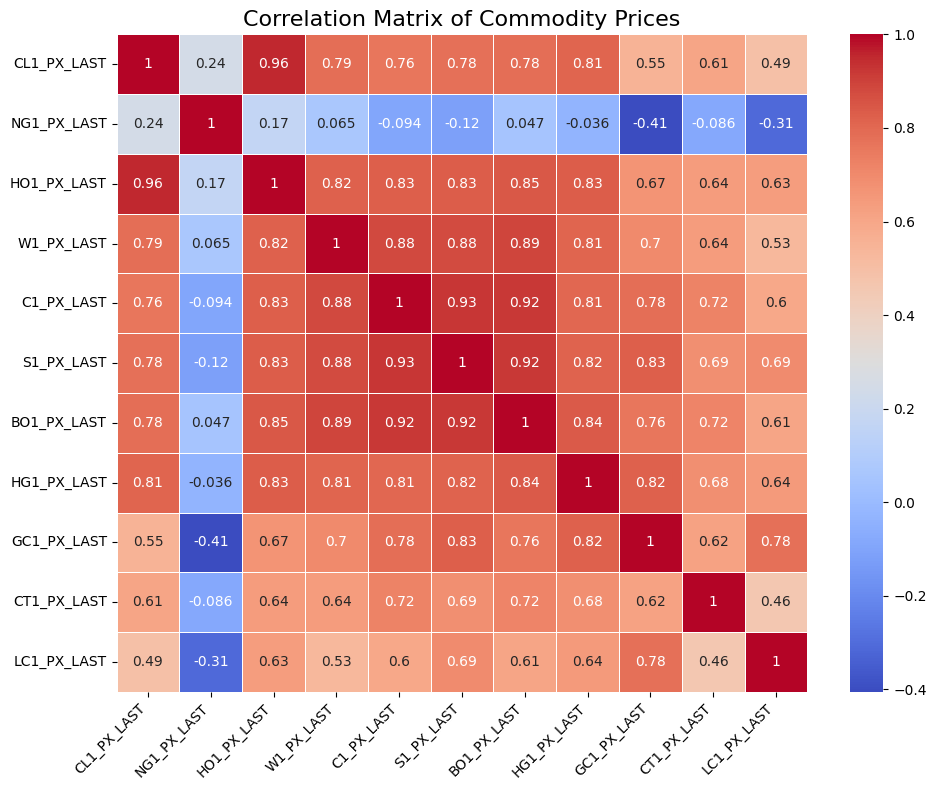

In [11]:
# Mapping of original column names to nicer labels
label_map = {
    'CL1_PX_LAST': 'Crude Oil',
    'NG1_PX_LAST': 'Natural Gas',
    'HO1_PX_LAST': 'Heating Oil',
    'W1_PX_LAST': 'Wheat',
    'C1_PX_LAST': 'Corn',
    'S1_PX_LAST': 'Soybeans',
    'BO1_PX_LAST': 'Soybean Oil',
    'HG1_PX_LAST': 'HG Copper',
    'GC1_PX_LAST': 'Gold',
    'CT1_PX_LAST': 'Cotton',
    'LC1_PX_LAST': 'Live Cattle'
}

# Subset the dataframe and calculate correlation
subset_df = df[columns_of_interest]
correlation = subset_df.corr()

# Rename columns and index using the mapping
correlation.rename(columns=label_map, index=label_map, inplace=True)

plt.figure(figsize=(8,8))
plt.title("Correlation Matrix of Commodity Prices")
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size":8}, cmap="Reds")
plt.show()

In [ ]:

# Error metric
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Rolling forecast for sklearn models (LR, RF, GBR)
def rolling_forecast(df, target_column, model_instance, window_size=50):
    y_true_all = []
    y_pred_all = []

    for i in range(window_size, len(df) - 1):
        train = df.iloc[i - window_size:i]
        test = df.iloc[i + 1:i + 2]  # 1-step ahead

        X_train = train.drop(columns=[target_column])
        y_train = train[target_column]
        X_test = test.drop(columns=[target_column])
        y_test = test[target_column]

        model = model_instance
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)[0]

        y_true_all.append(y_test.values[0])
        y_pred_all.append(prediction)

    mse = mean_squared_error(y_true_all, y_pred_all)
    r2 = r2_score(y_true_all, y_pred_all)
    mape = mean_absolute_percentage_error(y_true_all, y_pred_all)

    return {'MSE': mse, 'R2': r2, 'MAPE': mape}

# Hyperparameter tuning for RF and GBR
def tune_rf_hyperparams(df, target_column, window_size=100):
    train = df.iloc[:window_size]
    X_train = train.drop(columns=[target_column])
    y_train = train[target_column]

    rf = RandomForestRegressor(random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [20, 30, 10, None]
    }
    grid = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"Best RF params for {target_column}: {grid.best_params_}")
    return RandomForestRegressor(**grid.best_params_, random_state=42)

def tune_gb_hyperparams(df, target_column, window_size=100):
    train = df.iloc[:window_size]
    X_train = train.drop(columns=[target_column])
    y_train = train[target_column]

    gb = GradientBoostingRegressor(random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 0.9, 1.0]
    }
    grid = GridSearchCV(gb, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"Best GB params for {target_column}: {grid.best_params_}")
    return GradientBoostingRegressor(**grid.best_params_, random_state=42)

# Build LSTM model function for KerasRegressor
def create_lstm_model(units=50, lr=0.001):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(1,1)))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Build DNN model function for KerasRegressor
def create_dnn_model(units=50, lr=0.001):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_dim=1))
    model.add(Dense(units, activation='relu'))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Prepare data for keras models (LSTM and DNN)
def prepare_lstm_data(series, window_size=50):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(series.values.reshape(-1, 1))
    X, y = [], []
    for i in range(len(scaled) - window_size):
        X.append(scaled[i:i+window_size])
        y.append(scaled[i+window_size])
    X = np.array(X).reshape(-1, window_size, 1)
    y = np.array(y)
    return X, y, scaler

def prepare_dnn_data(series, window_size=50):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(series.values.reshape(-1, 1))
    X, y = [], []
    for i in range(len(scaled) - window_size):
        X.append(scaled[i:i+window_size].flatten())  # flatten window for DNN
        y.append(scaled[i+window_size])
    X = np.array(X)
    y = np.array(y)
    return X, y, scaler

# Tune LSTM hyperparameters 
def tune_lstm(df, target_column, window_size=50, n_iter=5):
    series = df[target_column]
    X, y, scaler = prepare_lstm_data(series, window_size)

    model = KerasRegressor(build_fn=create_lstm_model, verbose=0)

    param_dist = {
        'units': [50, 100, 150],
        'epochs': [50, 100, 150],
        'batch_size': [32, 64, 128]
    }

    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter, cv=3, verbose=1, n_jobs=1)
    random_search.fit(X, y)
    print(f"LSTM best params for {target_column}: {random_search.best_params_}")
    return random_search.best_params_, scaler

# Tune DNN hyperparameters with RandomizedSearchCV
def tune_dnn(df, target_column, window_size=50, n_iter=5):
    series = df[target_column]
    X, y, scaler = prepare_dnn_data(series, window_size)

    model = KerasRegressor(build_fn=create_dnn_model, verbose=0)

    param_dist = {
        'units': [50, 100, 150],
        'epochs': [50, 100, 150],
        'batch_size': [32, 64, 128]
    }

    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter, cv=3, verbose=1, n_jobs=1)
    random_search.fit(X, y)
    print(f"DNN best params for {target_column}: {random_search.best_params_}")
    return random_search.best_params_, scaler

# Rolling forecast for LSTM with tuned params
def rolling_forecast_lstm(df, target_column, best_params, scaler, window_size=50):
    y_true_all = []
    y_pred_all = []

    series = df[target_column].values
    scaled = scaler.transform(series.reshape(-1,1))

    for i in range(window_size, len(df) - 1):
        train_seq = scaled[i-window_size:i].reshape(1, window_size, 1)
        y_true = series[i]

        model = create_lstm_model(units=best_params['units'], lr=best_params['lr'])
        model.fit(train_seq, scaled[i-window_size:i], epochs=best_params['epochs'], verbose=0)
        pred_scaled = model.predict(train_seq)
        pred = scaler.inverse_transform(pred_scaled)[0][0]

        y_true_all.append(y_true)
        y_pred_all.append(pred)

    mse = mean_squared_error(y_true_all, y_pred_all)
    r2 = r2_score(y_true_all, y_pred_all)
    mape = mean_absolute_percentage_error(y_true_all, y_pred_all)

    return {'MSE': mse, 'R2': r2, 'MAPE': mape}

# Rolling forecast for DNN with tuned params
def rolling_forecast_dnn(df, target_column, best_params, scaler, window_size=50):
    y_true_all = []
    y_pred_all = []

    series = df[target_column].values
    scaled = scaler.transform(series.reshape(-1,1))

    for i in range(window_size, len(df) - 1):
        train_seq = scaled[i-window_size:i].reshape(1, window_size)  # Flattened for DNN
        y_true = series[i]

        model = create_dnn_model(units=best_params['units'], lr=best_params['lr'])
        model.fit(train_seq, scaled[i-window_size:i], epochs=best_params['epochs'], verbose=0)
        pred_scaled = model.predict(train_seq)
        pred = scaler.inverse_transform(pred_scaled)[0][0]

        y_true_all.append(y_true)
        y_pred_all.append(pred)

    mse = mean_squared_error(y_true_all, y_pred_all)
    r2 = r2_score(y_true_all, y_pred_all)
    mape = mean_absolute_percentage_error(y_true_all, y_pred_all)

    return {'MSE': mse, 'R2': r2, 'MAPE': mape}


window_size = 50

results = {}

for col in columns_of_interest:
    print(f"\n=== Processing {col} ===")

    # Linear Regression (no tuning)
    lr_model = LinearRegression()
    lr_results = rolling_forecast(df, col, lr_model, window_size=window_size)

    # Random Forest tuning and forecast
    rf_model = tune_rf_hyperparams(df, col, window_size=100)
    rf_results = rolling_forecast(df, col, rf_model, window_size=window_size)

    # Gradient Boosting tuning and forecast
    gb_model = tune_gb_hyperparams(df, col, window_size=100)
    gb_results = rolling_forecast(df, col, gb_model, window_size=window_size)

    # LSTM tuning
    lstm_best_params, lstm_scaler = tune_lstm(df, col, window_size=window_size, n_iter=5)
    lstm_results = rolling_forecast_lstm(df, col, lstm_best_params, lstm_scaler, window_size=window_size)

    # DNN tuning
    dnn_best_params, dnn_scaler = tune_dnn(df, col, window_size=window_size, n_iter=5)
    dnn_results = rolling_forecast_dnn(df, col, dnn_best_params, dnn_scaler, window_size=window_size)

    results[col] = {
        'LinearRegression': lr_results,
        'RandomForest': rf_results,
        'GradientBoosting': gb_results,
        'LSTM': lstm_results,
        'DNN': dnn_results
    }

# Print summarized results
for commodity, res in results.items():
    print(f"\nResults for {commodity}:")
    for model_name, metrics in res.items():
        print(f" {model_name}: MSE={metrics['MSE']:.3f}, R2={metrics['R2']:.3f}, MAPE={metrics['MAPE']:.3f}%")


Prediction sentiment price

In [ ]:
!pip install praw
import praw
from transformers import pipeline, RobertaForSequenceClassification, RobertaTokenizer, BertForSequenceClassification, BertTokenizer, DistilBertForSequenceClassification, DistilBertTokenizer

# Reddit API credentials
reddit_client_id = 'bfr--CssnTdgrFGIwK_prQ'
reddit_client_secret = 'FPm-1pUWywIqnCjTo8enZwtg9lxtbQ'
reddit_user_agent = 'MytestApp/1.0 by IndependenceNew2283'

# Authenticate with Reddit API using PRAW
reddit = praw.Reddit(client_id=reddit_client_id,
                     client_secret=reddit_client_secret,
                     user_agent=reddit_user_agent)

# Define the subreddit and keywords related to commodities
subreddit_name = 'commodities'
keywords = ['gold', 'silver', 'oil', 'copper', 'soybean', 'cotton', 'cattle', 'cotton', 'wheat', 'corn', 'gas','commodity','commodities','stock market']

# Fetch submissions from the subreddit and filter by keywords
subreddit = reddit.subreddit(subreddit_name)

# Define the number of submissions to fetch (400 000 lines)
total_submissions = 400000
batch_size = 100

# Extract data from submissions
data = {'title': [], 'body': [], 'created_utc': []}
for _ in range(total_submissions // batch_size):
    submissions = subreddit.search(' OR '.join(keywords), sort='new', limit=batch_size)
    for submission in submissions:
        data['title'].append(submission.title)
        data['body'].append(submission.selftext)
        data['created_utc'].append(submission.created_utc)

# Create a DataFrame from the extracted data
reddit_data = pd.DataFrame(data)

In [ ]:
# Load sentiment analysis models and tokenizers
roberta_sentiment_model = pipeline('sentiment-analysis', model=RobertaForSequenceClassification.from_pretrained('roberta-base'), tokenizer=RobertaTokenizer.from_pretrained('roberta-base'))
bert_sentiment_model = pipeline('sentiment-analysis', model=BertForSequenceClassification.from_pretrained('bert-base-uncased'), tokenizer=BertTokenizer.from_pretrained('bert-base-uncased'))
distilbert_sentiment_model = pipeline('sentiment-analysis', model=DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased'), tokenizer=DistilBertTokenizer.from_pretrained('distilbert-base-uncased'))

max_seq_length = 512
reddit_data['body'] = reddit_data['body'].apply(lambda x: x[:max_seq_length])

# Apply sentiment analysis using RoBERTa, BERT, and DistilBERT
reddit_data['title_sentiment_roberta'] = reddit_data['title'].apply(lambda x: roberta_sentiment_model(x)[0]['label'])
reddit_data['body_sentiment_roberta'] = reddit_data['body'].apply(lambda x: roberta_sentiment_model(x)[0]['label'])

reddit_data['title_sentiment_bert'] = reddit_data['title'].apply(lambda x: bert_sentiment_model(x)[0]['label'])
reddit_data['body_sentiment_bert'] = reddit_data['body'].apply(lambda x: bert_sentiment_model(x)[0]['label'])

reddit_data['title_sentiment_distilbert'] = reddit_data['title'].apply(lambda x: distilbert_sentiment_model(x)[0]['label'])
reddit_data['body_sentiment_distilbert'] = reddit_data['body'].apply(lambda x: distilbert_sentiment_model(x)[0]['label'])

print(reddit_data)

In [ ]:
reddit_data['created_utc'] = pd.to_datetime(reddit_data['created_utc'], unit='s', utc=True)
reddit_data['created_utc'] = reddit_data['created_utc'].dt.tz_convert('GMT')

In [ ]:
#label_mapping = {'LABEL_0': 'Negative', 'LABEL_1': 'Neutral', 'LABEL_2': 'Positive'}
label_mapping = {'LABEL_0': '0', 'LABEL_1': '-1', 'LABEL_2': '1'}

for model in ['roberta', 'bert', 'distilbert']:
    reddit_data[f'title_sentiment_{model}'] = reddit_data[f'title_sentiment_{model}'].map(label_mapping)
    reddit_data[f'body_sentiment_{model}'] = reddit_data[f'body_sentiment_{model}'].map(label_mapping)

# Visualize Sentiment Distribution
#labels = ['Negative', 'Neutral', 'Positive']
labels = ['-1', '0', '1']
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

bar_width = 0.35  # Adjust the width of the bars
for i, model in enumerate(['roberta', 'bert', 'distilbert']):
    # Title Sentiment
    title_sentiment_counts = reddit_data[f'title_sentiment_{model}'].value_counts().reindex(labels, fill_value=0)
    axs[i].bar(labels, title_sentiment_counts, color='skyblue', label=f'Title ({model.capitalize()})', width=bar_width)

    # Body Sentiment
    body_sentiment_counts = reddit_data[f'body_sentiment_{model}'].value_counts().reindex(labels, fill_value=0)
    axs[i].bar([x + bar_width for x in range(len(labels))], body_sentiment_counts, color='#CBC3E3', alpha=0.7, label=f'Body ({model.capitalize()})', width=bar_width)

    axs[i].set_title(f'{model.capitalize()} Sentiment Distribution')
    axs[i].legend()  # Add legend to each subplot

fig.suptitle('Sentiment Analysis on Reddit Data')
plt.tight_layout()
plt.show()


In [ ]:
# Save the DataFrame to a CSV file
reddit_data.to_csv('reddit_data.csv', index=False)

In [ ]:
# Load BERT pipeline
bert_model = pipeline('sentiment-analysis',
                      model=BertForSequenceClassification.from_pretrained('bert-base-uncased'),
                      tokenizer=BertTokenizer.from_pretrained('bert-base-uncased'))

# Apply sentiment analysis
reddit_data['title_sentiment_bert'] = reddit_data['title'].apply(lambda x: bert_model(x)[0]['label'])
reddit_data['body_sentiment_bert'] = reddit_data['body'].apply(lambda x: bert_model(x)[0]['label'])

# Convert sentiment labels
label_mapping = {'LABEL_0': -1, 'LABEL_1': 0, 'LABEL_2': 1}
reddit_data['title_sentiment_bert'] = reddit_data['title_sentiment_bert'].map(label_mapping)
reddit_data['body_sentiment_bert'] = reddit_data['body_sentiment_bert'].map(label_mapping)

# Daily average sentiment
#daily_sentiment = reddit_data.groupby('date')[['title_sentiment_bert', 'body_sentiment_bert']].mean().reset_index()
reddit_data['created_utc'] = pd.to_datetime(reddit_data['created_utc'], unit='s', utc=True)
reddit_data['created_utc'] = reddit_data['created_utc'].dt.tz_convert('GMT')

# FIX: Extract date for grouping
reddit_data['date'] = reddit_data['created_utc'].dt.date

# Now this will work
daily_sentiment = reddit_data.groupby('date')[['title_sentiment_bert', 'body_sentiment_bert']].mean().reset_index()

# Ensure both columns are datetime type
#df['Dates'] = pd.to_datetime(df['Dates'])
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])

# Perform the merge
df = df.merge(daily_sentiment, how='left', left_on='Dates', right_on='date')

# Drop extra column and fill missing sentiment values
df.drop(columns=['date'], inplace=True)
df.fillna(0, inplace=True)


# Add calendar features
df['DayOfWeek'] = df['Dates'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

# Merge sentiment
df = df.merge(daily_sentiment, how='left', left_on='Dates', right_on='date')
df.drop(columns=['date'], inplace=True)
df.fillna(0, inplace=True)

In [ ]:

#Rolling Forecast Function
def rolling_forecast(df, target_column, model_instance, window_size=50):
    y_true_all = []
    y_pred_all = []

    for i in range(window_size, len(df) - 1):
        train = df.iloc[i - window_size:i]
        test = df.iloc[i + 1:i + 2]

        X_train = train.drop(columns=[target_column])
        y_train = train[target_column]
        X_test = test.drop(columns=[target_column])
        y_test = test[target_column]

        model = model_instance
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)[0]

        y_true_all.append(y_test.values[0])
        y_pred_all.append(prediction)

    mse = mean_squared_error(y_true_all, y_pred_all)
    r2 = r2_score(y_true_all, y_pred_all)
    mape = mean_absolute_percentage_error(y_true_all, y_pred_all)

    return {'MSE': mse, 'R2': r2, 'MAPE': mape}

# LSTM Forecasting Function
def lstm_forecast(df, target_column, window_size=50):
    df_scaled = MinMaxScaler().fit_transform(df)
    target_index = df.columns.get_loc(target_column)

    X, y = [], []
    for i in range(window_size, len(df_scaled)):
        X.append(df_scaled[i - window_size:i])
        y.append(df_scaled[i, target_index])
    X, y = np.array(X), np.array(y)

    split = int(0.8 * len(X))
    X_train, y_train = X[:split], y[:split]
    X_test, y_test = X[split:], y[split:]

    def build_model(hp):
        model = Sequential()
        model.add(LSTM(hp.Int('units', 32, 128, step=32), activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        return model

    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=3,
        executions_per_trial=1,
        directory='lstm_tuning',
        project_name=f'lstm_{target_column}'
    )

    tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(patience=3)], verbose=0)
    model = tuner.get_best_models(1)[0]
    y_pred = model.predict(X_test).flatten()

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    return {'MSE': mse, 'R2': r2, 'MAPE': mape}

# DNN Forecasting Function
def dnn_forecast(df, target_column, window_size=50):
    df_scaled = MinMaxScaler().fit_transform(df)
    target_index = df.columns.get_loc(target_column)

    X, y = [], []
    for i in range(window_size, len(df_scaled)):
        X.append(df_scaled[i - window_size:i].flatten())
        y.append(df_scaled[i, target_index])
    X, y = np.array(X), np.array(y)

    split = int(0.8 * len(X))
    X_train, y_train = X[:split], y[:split]
    X_test, y_test = X[split:], y[split:]

    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(patience=3)], verbose=0)
    y_pred = model.predict(X_test).flatten()

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    return {'MSE': mse, 'R2': r2, 'MAPE': mape}

# Model Evaluation 
df = df.drop(columns=['Dates'])
df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)

all_results = {}

for model_name, model in {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
}.items():
    model_results = {}
    for col in columns_of_interest:
        print(f"Running {model_name} forecast for: {col}")
        res = rolling_forecast(df_scaled, target_column=col, model_instance=model, window_size=50)
        model_results[col] = res
    all_results[model_name] = pd.DataFrame(model_results).T

# LSTM and DNN 
for model_type in ['LSTM', 'DNN']:
    model_results = {}
    for col in columns_of_interest:
        print(f"Running {model_type} forecast for: {col}")
        if model_type == 'LSTM':
            res = lstm_forecast(df_scaled, target_column=col, window_size=50)
        else:
            res = dnn_forecast(df_scaled, target_column=col, window_size=50)
        model_results[col] = res
    all_results[model_type] = pd.DataFrame(model_results).T

# Display Results
for name, result_df in all_results.items():
    print(f"\nModel: {name}")
    print(result_df.round(3))


In [ ]:
!pip install feedparser
import feedparser
import urllib.parse

# Define keywords related to commodities
keywords = ['gold', 'silver', 'oil', 'copper', 'soybean', 'cotton', 'cattle', 'cotton', 'wheat', 'corn', 'gas', 'commodity', 'commodities', 'stock market']

# Fetch news articles related to commodities from Google News (500 000 lines) 
news_data = {'title': [], 'summary': [], 'published': []}
total_lines = 500000
lines_fetched = 0
batch_size = 100

while lines_fetched < total_lines:
    for keyword in keywords:
        # Encode keyword for URL
        encoded_keyword = urllib.parse.quote_plus(keyword)
        feed_url = f'https://news.google.com/rss/search?q={encoded_keyword}&hl=en-US&gl=US&ceid=US:en'
        feed = feedparser.parse(feed_url)
        for entry in feed.entries:
            news_data['title'].append(entry.title)
            news_data['summary'].append(entry.summary)
            news_data['published'].append(entry.published)
            lines_fetched += 1
            if lines_fetched >= total_lines:
                break
        if lines_fetched >= total_lines:
            break
    if lines_fetched >= total_lines:
        break

# Create a DataFrame from the extracted news data
google_news_df = pd.DataFrame(news_data)


In [ ]:
# Load sentiment analysis models and tokenizers
roberta_sentiment_model = pipeline('sentiment-analysis', model=RobertaForSequenceClassification.from_pretrained('roberta-base'), tokenizer=RobertaTokenizer.from_pretrained('roberta-base'))
bert_sentiment_model = pipeline('sentiment-analysis', model=BertForSequenceClassification.from_pretrained('bert-base-uncased'), tokenizer=BertTokenizer.from_pretrained('bert-base-uncased'))
distilbert_sentiment_model = pipeline('sentiment-analysis', model=DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased'), tokenizer=DistilBertTokenizer.from_pretrained('distilbert-base-uncased'))

# Truncate the 'summary' text to fit within the model's maximum sequence length
max_seq_length = 512
google_news_df['summary'] = google_news_df['summary'].apply(lambda x: x[:max_seq_length])

# Apply sentiment analysis using RoBERTa, BERT, and DistilBERT
google_news_df['title_sentiment_roberta'] = google_news_df['title'].apply(lambda x: roberta_sentiment_model(x)[0]['label'])
google_news_df['summary_sentiment_roberta'] = google_news_df['summary'].apply(lambda x: roberta_sentiment_model(x)[0]['label'])

google_news_df['title_sentiment_bert'] = google_news_df['title'].apply(lambda x: bert_sentiment_model(x)[0]['label'])
google_news_df['summary_sentiment_bert'] = google_news_df['summary'].apply(lambda x: bert_sentiment_model(x)[0]['label'])

google_news_df['title_sentiment_distilbert'] = google_news_df['title'].apply(lambda x: distilbert_sentiment_model(x)[0]['label'])
google_news_df['summary_sentiment_distilbert'] = google_news_df['summary'].apply(lambda x: distilbert_sentiment_model(x)[0]['label'])

# Display the DataFrame with sentiment analysis results
print(google_news_df)

In [ ]:
# Map labels for sentiment categories
label_mapping = {'LABEL_0': '-1', 'LABEL_1': '0', 'LABEL_2': '1'}

# Map sentiment labels in the DataFrame
for model in ['roberta', 'bert', 'distilbert']:
    google_news_df[f'title_sentiment_{model}'] = google_news_df[f'title_sentiment_{model}'].map(label_mapping)
    google_news_df[f'summary_sentiment_{model}'] = google_news_df[f'summary_sentiment_{model}'].map(label_mapping)

# Visualize Sentiment Distribution
labels = ['-1', '0', '1']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

bar_width = 0.35
for i, model in enumerate(['roberta', 'bert', 'distilbert']):
    title_sentiment_counts = google_news_df[f'title_sentiment_{model}'].value_counts().reindex(labels, fill_value=0)
    axs[i].bar(labels, title_sentiment_counts, color='skyblue', label=f'Title ({model.capitalize()})', width=bar_width)
    summary_sentiment_counts = google_news_df[f'summary_sentiment_{model}'].value_counts().reindex(labels, fill_value=0)
    axs[i].bar([x + bar_width for x in range(len(labels))], summary_sentiment_counts, color='#CBC3E3', alpha=0.7, label=f'Summary ({model.capitalize()})', width=bar_width)

    axs[i].set_title(f'{model.capitalize()} Sentiment Distribution')
    axs[i].legend()

fig.suptitle('Sentiment Analysis on Google News Data')

plt.tight_layout()
plt.show()

In [ ]:
news_df.to_csv('news_df.csv', index=False)

In [ ]:
# Convert raw date strings to datetime.date
def parse_google_date(raw_date):
    try:
        if 'ago' in raw_date.lower():
            num, unit = raw_date.split()[0], raw_date.split()[1]
            unit = unit if unit.endswith('s') else unit + 's'
            return (datetime.now() - timedelta(**{unit: int(num)})).date()
        else:
            return pd.to_datetime(raw_date).date()
    except:
        return pd.NaT

google_news_df['date'] = google_news_df['date'].apply(parse_google_date)
google_news_df.dropna(subset=['date'], inplace=True)

# Load BERT pipeline for sentiment
bert_model = pipeline('sentiment-analysis',
                      model=BertForSequenceClassification.from_pretrained('bert-base-uncased'),
                      tokenizer=BertTokenizer.from_pretrained('bert-base-uncased'))

# Apply BERT to headlines
google_news_df['title_sentiment_bert'] = google_news_df['title'].apply(lambda x: bert_model(x)[0]['label'])

# Map BERT labels to scores
label_mapping = {'LABEL_0': -1, 'LABEL_1': 0, 'LABEL_2': 1}
google_news_df['title_sentiment_bert'] = google_news_df['title_sentiment_bert'].map(label_mapping)

# Daily average sentiment
daily_google_sentiment = google_news_df.groupby('date')['title_sentiment_bert'].mean().reset_index()
daily_google_sentiment.rename(columns={'title_sentiment_bert': 'google_news_sentiment'}, inplace=True)


In [ ]:
# Ensure both columns are datetime type
df['Dates'] = pd.to_datetime(df['Dates'])
daily_google_sentiment['date'] = pd.to_datetime(daily_google_sentiment['date'])

# Perform the merge
df = df.merge(daily_google_sentiment, how='left', left_on='Dates', right_on='date')

# Drop extra column and fill missing sentiment values
df.drop(columns=['date'], inplace=True)
df.fillna(0, inplace=True)


# Add calendar features
df['DayOfWeek'] = df['Dates'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

# Merge sentiment
df = df.merge(daily_google_sentiment, how='left', left_on='Dates', right_on='date')
df.drop(columns=['date'], inplace=True)
df.fillna(0, inplace=True)


In [ ]:
df = df.drop(columns=['Dates'])
df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)

all_results = {}

for model_name, model in {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
}.items():
    model_results = {}
    for col in columns_of_interest:
        print(f"Running {model_name} forecast for: {col}")
        res = rolling_forecast(df_scaled, target_column=col, model_instance=model, window_size=50)
        model_results[col] = res
    all_results[model_name] = pd.DataFrame(model_results).T

# LSTM and DNN 
for model_type in ['LSTM', 'DNN']:
    model_results = {}
    for col in columns_of_interest:
        print(f"Running {model_type} forecast for: {col}")
        if model_type == 'LSTM':
            res = lstm_forecast(df_scaled, target_column=col, window_size=50)
        else:
            res = dnn_forecast(df_scaled, target_column=col, window_size=50)
        model_results[col] = res
    all_results[model_type] = pd.DataFrame(model_results).T

# Display Results
for name, result_df in all_results.items():
    print(f"\nModel: {name}")
    print(result_df.round(3))
